# Linear Regression - to be submitted

In [2]:
# import required libraries
import os
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
os.chdir(".../Chapter 3/Linear Regression")
os.getcwd()

#### Read data

In [4]:
df_housingdata = pd.read_csv("Final_HousePrices.csv")

In [5]:
df_housingdata.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NoAccess,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NoAccess,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NoAccess,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NoAccess,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NoAccess,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


#### We start by identifying our numeric and categorical variables.

In [6]:
df_housingdata.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage       int64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea        int64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
                  ...  
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Functional       object
Fireplaces        int64
FireplaceQu      object
GarageType       object
GarageYrBlt       int64
GarageFinish     object
GarageCars      

In [7]:
df_housingdata.corr(method='pearson')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


#### Besides the correlation between the variables, we'd also like to study the correlation between the predictor variables and the response variable.

In [8]:
correlation = df_housingdata.corr(method='pearson')

# Our response variable "SalePrice" is in the last. We remove correlation with itself.
correlation_response = correlation.iloc[-1][:-1]

# variables sorted in descending manner
correlation_response.sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#### To sort correlations by absolute values

In [9]:
correlation_response[abs(correlation_response).argsort()[::-1]]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass      -0.084284
OverallCond     -0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64

#### Correlation

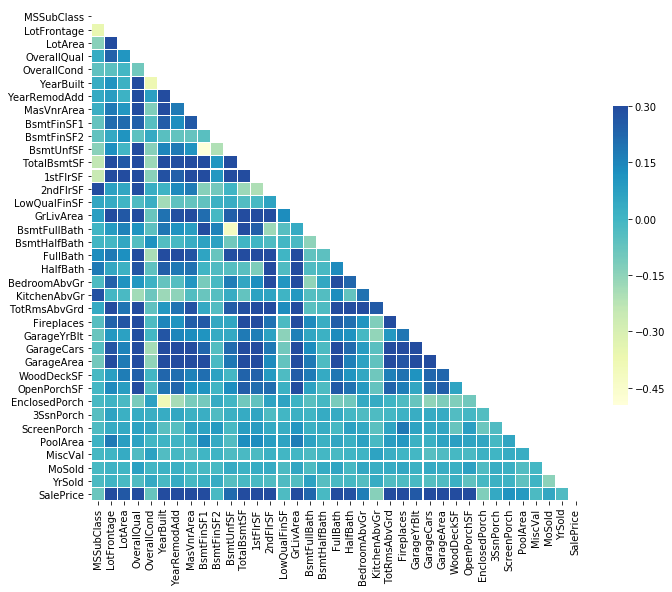

In [10]:
# Generate a mask for the upper triangle
# np.zeros_like - Returns an array of zeros with the same shape and type as per given array
# In this case we pass the correlation matrix
# we create a variable "mask" which is a 14 X 14 numpy array
mask = np.zeros_like(correlation, dtype=np.bool)

# We create a tuple with triu_indices_from() by passing the "mask" array
# k is used to offset diagonal
# with k=0, we offset all diagnoals
# If we put k=13, means we offset 14-13=1 diagonal 

# triu_indices_from() Return the indices for the upper-triangle of arr.
mask[np.triu_indices_from(mask, k=0)] = True

# Setting the plot size
fig, axis = plt.subplots(figsize=(11, 11))

# cbar_kws={"shrink": 0.5} is shrinking the legend color bar
sns.heatmap(correlation,  mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": 0.5})

#### See distribution of the target variable

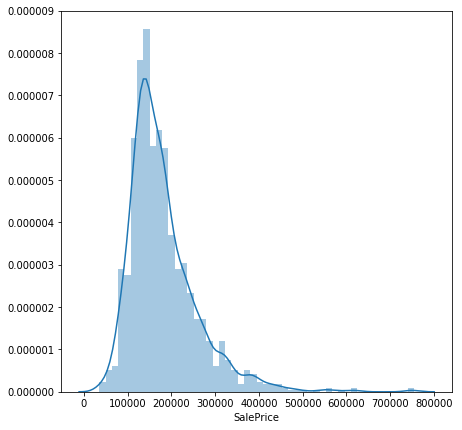

In [11]:
# Setting the plot size
fig, axis = plt.subplots(figsize=(7, 7))

# We use kde=True to plot the gaussian kernel density estimate
sns.distplot(df_housingdata['SalePrice'], bins=50, kde=True)

#### We can also use JointGrid() from our seaborn package to plot combination of plots

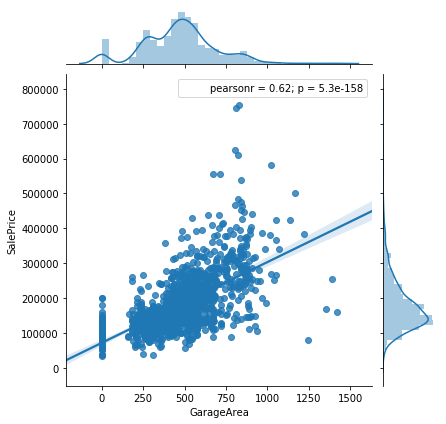

In [12]:
from scipy import stats
g = sns.JointGrid(df_housingdata['GarageArea'], df_housingdata['SalePrice'])
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

#### Let us now scale our numeric variables

In [17]:
# create a variable to hold the names of the data types viz int16, in32 and so on
num_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Filter out variables with numeric data types
df_numcols_only = df_housingdata.select_dtypes(include=num_cols)

In [18]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

# Scaling down the numeric variables
# We exclude SalePrice using iloc() on df_numcols_only data frame
df_housingdata_numcols=pd.DataFrame(min_max.fit_transform(df_numcols_only.iloc[:,0:36]), \
                                    columns=df_numcols_only.iloc[:,0:36].columns.tolist())

#### Perform one-hot encoding on our categorical variables

In [19]:
# We exclude all numeric columns
df_housingdata_catcol = df_housingdata.select_dtypes(exclude=num_cols)

# Steps to one-hot encoding:
# We iterate through each categorical column name
# Create encoded variables for each categorical columns
# Concatenate the encoded variables to the data frame
# Remove the original categorical variable
for col in df_housingdata_catcol.columns.values:
    one_hot_enoded_variables = pd.get_dummies(df_housingdata_catcol[col],prefix=col)
    df_housingdata_catcol = pd.concat([df_housingdata_catcol,one_hot_enoded_variables],axis=1)
    df_housingdata_catcol.drop([col],axis=1, inplace=True)

In [20]:
df_housedata = pd.concat([df_housingdata_numcols, df_housingdata_catcol], axis=1)

In [21]:
# Concatenate SalePrice to the final data frame
df_housedata_final = pd.concat([df_housedata, df_numcols_only.iloc[:,36]], axis=1)

In [22]:
df_housedata_final.shape

(1460, 303)

In [23]:
# Create feature and response variable set
# We create train & Test sample from our dataset
from sklearn.model_selection import train_test_split

# create feature & response variables
X = df_housedata_final.iloc[:,0:302]
Y = df_housedata_final['SalePrice']

# Create train & test sets
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.30, random_state=1)

### Linear model fitted by minimizing a regularized empirical loss with SGD

In [26]:
import numpy as np
from sklearn.linear_model import SGDRegressor

lin_model = SGDRegressor()

# We fit our model with train data
lin_model.fit(X_train, Y_train)

# We use predict() to predict our values
lin_model_predictions = lin_model.predict(X_test)

# We check the coefficient of determination with score()
print(lin_model.score(X_test, Y_test))

# We can also check the coefficient of determination with r2_score() from sklearn.Metrics
from sklearn.metrics import r2_score
print(r2_score(Y_test, lin_model_predictions))

0.805760693173
0.805760693173


/Users/Dippies/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(lin_model_predictions, Y_test)
rmse = np.sqrt(mse)
print(rmse)

37241.4751428


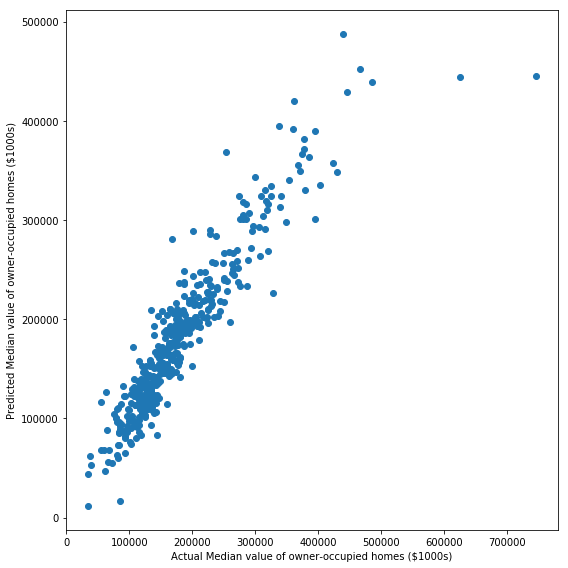

In [49]:
# We can plot the actuals and the predicted values 
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, lin_model_predictions)
plt.xlabel('Actual Median value of house prices ($1000s)')
plt.ylabel('Predicted Median value of house prices ($1000s)')
plt.tight_layout()

#### We change the hyper-parameters and compare the results

In [28]:
import numpy as np
from sklearn.linear_model import SGDRegressor

lin_model = SGDRegressor(alpha=0.0000001, max_iter=2000)

# We fit our model with train data
lin_model.fit(X_train, Y_train)

# We use predict() to predict our values
lin_model_predictions = lin_model.predict(X_test)

# We check the coefficient of determination with score()
print(lin_model.score(X_test, Y_test))

# We can also check the coefficient of determination with r2_score() from sklearn.Metrics
from sklearn.metrics import r2_score
print(r2_score(Y_test, lin_model_predictions))

0.867391743008
0.867391743008


In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(lin_model_predictions, Y_test)
rmse = np.sqrt(mse)
print(rmse)

30771.1408906


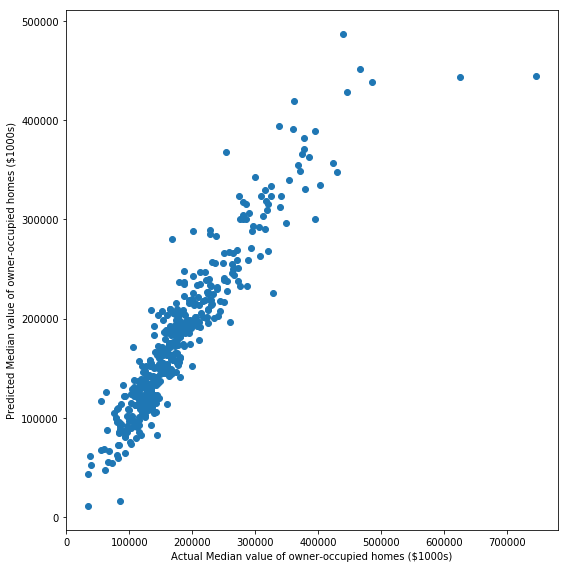

In [30]:
# We can plot the actuals and the predicted values 
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, lin_model_predictions)
#plt.plot([0, 50], [0, 50], '--r')
plt.xlabel('Actual Median value of owner-occupied homes ($1000s)')
plt.ylabel('Predicted Median value of owner-occupied homes ($1000s)')
plt.tight_layout()